# Expertise Identification

In [1]:
import pandas as pd
import numpy as np

In [2]:
from collections import Counter

In [3]:
import matplotlib.pyplot as plt 
%matplotlib inline
plt.rcParams["figure.figsize"] = (20,7)

In [4]:
dataset = pd.read_csv("data_set.csv")

# Data Analysis

In [5]:
dataset.head()

,Content,Expertise
0,Jean Christophe AMY Partner Structure Division...,Mergers And Acquisitions
1,Guillaume ANSALONI Partner Structure Division ...,"Corporate Law (M&A, Private Equity And Company..."
2,Franck BAUCHET Partner Structure Division Fran...,Tax Structuring
3,Didier BRUERE-DAWSON Partner Structure Divisio...,Litigation (M&A And Financing Projects)
4,Catherine CASTRO Partner Structure Division Ca...,Real Estate


In [6]:
x = dataset.iloc[:,0].values

In [7]:
y = dataset.iloc[:,1].values 

In [8]:
l = Counter(y).keys() # equals to list(set(words))
c = Counter(y).values() # counts the elements' frequency

In [9]:
print("No of category :",len(l))

No of category : 80


In [10]:
data={}
for i , j in  zip(l,c) :
    data[i]=j
print(data)    

{'Mergers And Acquisitions': 3, 'Corporate Law (M&A, Private Equity And Company Law)': 1, 'Tax Structuring': 1, 'Litigation (M&A And Financing Projects)': 1, 'Real Estate': 2, 'Mergers & Acquisitions': 2, 'Litigation In Intellectual Property Law(Copyright, Neighbouring Rights, Trademarks, Designs And Patents)': 1, 'Litigation And Arbitration': 1, 'Regulatory Issues': 1, 'Legal, Tax, Labour And Refinancing Issues': 1, 'Business Law': 4, 'Real Estate Law': 3, 'Intellectual Property': 12, 'Labor & Employment Law Matters': 1, 'Computer Security': 1, 'European Law (Litigation And Transaction)': 1, 'Information Technology': 1, 'Banking And Finance Law': 2, 'Health And Especially In The Fields Of Pharmaceuticals And Biotechnology': 1, 'French And International Tax': 1, 'Pre-Litigation': 1, 'Antitrust And European Union Law': 1, 'Litigation': 4, 'Antitrust': 1, 'Corporate Law': 6, 'Dispute Resolution/Arbitration': 1, 'Banking And Finance': 2, 'International And Domestic Arbitration': 1, 'Media

Text(0,0.5,'no of records')

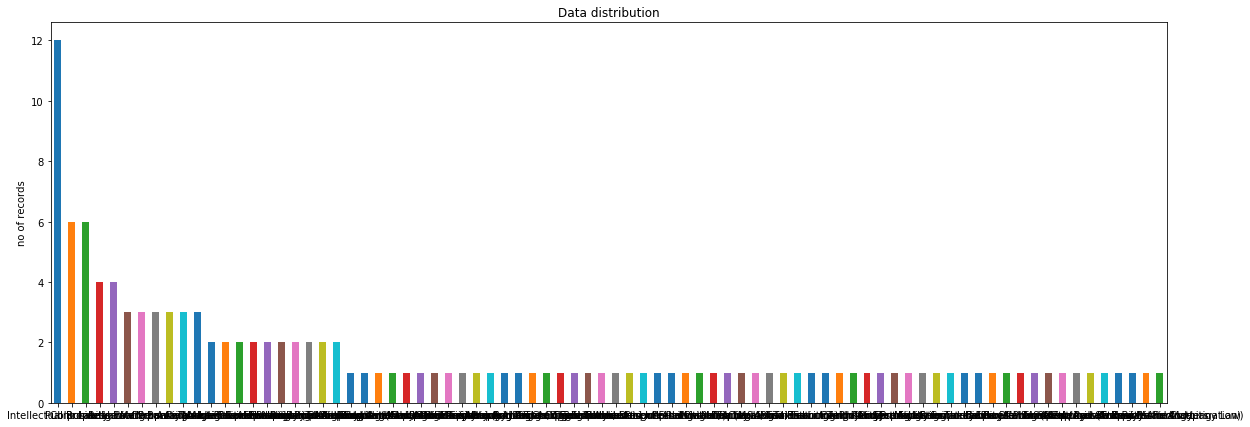

In [11]:
lables = list(set(y))
count_classes = pd.value_counts(dataset['Expertise'], sort = True)
count_classes.plot(kind = 'bar', rot=0)
plt.title("Data distribution")
plt.ylabel("no of records")

# Reason to choose model

It seems like the imbalance class distribution,so it s little hard to train and get good accuracy!!

Below are the approcah we can do for this problem 

1) Bi-directional LSTM or GRU classifier ( But need more data ).

2) Generate Expetise  using LSTM autoencoder ( But Need More data)


We can generated data using below data agumentation technique  
ref : https://towardsdatascience.com/data-augmentation-for-text-data-obtain-more-data-faster-525f7957acc9
but due to  multi class and imbalance class distribution we cant do it .


3) finally we can use NLP to extract patten by builting custom Phrase Matchers,Best tools to do is NLTK,SPACY,TEXTBLOB .I chossed Spacy (https://spacy.io/api/) to solve this problem .



# Installation 

!conda install -c danielfrg spacy-en_core_web_sm  -y

# BUILT

In [12]:
import en_core_web_sm
nlp = en_core_web_sm.load()
from spacy.matcher import PhraseMatcher

/home/vijay/anaconda3/lib/python3.6/site-packages/requests/__init__.py:80: RequestsDependencyWarning: urllib3 (1.24.1) or chardet (3.0.4) doesn't match a supported version!
  RequestsDependencyWarning)


In [13]:
patten = ['Real Estate Matters',
 'Intellectual Property Law',
 'Public Law',
 'Private Equity',
 'Property Law',
 'International And Domestic Arbitration',
 'Financing',
 'Information Technology',
 'Not Available',
 'Commercial',
 'Pre-Litigation',
 'e-health',
 'Litigation And Pre-Litigation',
 'Corporate Law (M&A,',
 'Private Equity And Company Law)'
 'Corporate Law',
 'Tax',
 'Antitrust And European Union Law',
 'Litigation (M&A And Financing Projects)',
 'R&D',
 'Criminal Law',
 'Corporate And Private Client Tax Law',
 'Banking And Finance',
 'Project And Structured Finance',
 'Employment',
 'New Technology Law',
 'Tax Advice',
 'business',
 'Dispute Litigation',
 'Contract',
 'Intellectual Property',
 'French And International Tax',
 'Banking And Finance Law',
 'Mergers & Acquisitions',
 'Natural resources',
 'Employment Law',
 'Tax Law',
 'Mergers And Acquisitions',
 'merger and acquisitions',
 'M&A-Corporate',
 'Dispute Resolution/Arbitration',
 'Investment Funds',
 'Tax Advice And Tax Litigation',
 'Corporate Finance',
 'Commercial Law',
 'Banking & Finance',
 'Capital Market',
 'Litigation',
 'Litigation And Arbitration',
 'Business Law',
 'Corporate',
 'Regulatory Issues',
 'Community',
 'Real Estate',
 'Labour Law',
 'Bankruptcy Proceedings',
 'Labor & Employment Law Matters',
 'Tax Structuring',
 'European Law (Litigation And Transaction)',
 'European Law'
 'Corporate Law,Mergers & Acquisitions',
 'Intellectual Property Crises Litigation',
 'Real Estate Law',
 'Computer Security',
 'Antitrust',
 'Media',
 'Competition Law',
 'Ip Law',
 'Business Litigation And Pre-Litigation',
 'Project finance',
 'Pharmaceuticals ',
 'Pharmaceuticals and Biotechnology',
 'Corporate Litigation',
 'Economic Public Law',
 'Corporate Tax Management And Strategy',
 'Legal, Tax, Labour',
 'Refinancing Issues',         
 'Technologies',
 'European Law (Transactions And Litigation)',
 'Labor',
 'Corporate Business Law',
 'Liability law',
 'Media Law',
 'Litigation In Intellectual Property Law',
 'arbitration',
 'Healthcare Law',
 'software anti-piracy',
 'cyber criminality',
 'fund structuring',
 'asset management',
 'IP-related']

In [14]:
keywords=[
'experienced ',
'expertise in ',
'focuses on ',
'experience in ',
'involved in ',
'specialised in ',
'specialises in '    
]

In [15]:
new_patten=[]
reg_patten=[]

for i in keywords:
    for j in patten:
        if len((i+j).split()) >10:
            reg_patten.append(i+j)
        else:
            new_patten.append(i+j)
new_patten= new_patten+patten
    

In [16]:
Expertise_patterns = [nlp(text) for text in [x.lower() for x in new_patten]]
matcher = PhraseMatcher(nlp.vocab)
matcher.add('Expertise', None, *Expertise_patterns)

In [17]:
def edu_preprocess(x):
    education_patterns = [nlp(text) for text in ['education']]
    education = PhraseMatcher(nlp.vocab)
    education.add('Expertise', None, *education_patterns)
    
    doc = nlp(x.lower())
    education_content = education(doc)
    #print(education_content)
    
    content=''
    if len(education_content) > 0:
        #print('inside')
        for match_id, start, end in education_content:
            #rule_id = nlp.vocab.strings[match_id]  
            span = doc[0:start]
            content = span.text
        return content  

    return x

In [18]:
def find_with_expertise(x):
    inp = edu_preprocess(x)
    doc = nlp(inp.lower())
    matches = matcher(doc)
    data =[]
    for match_id, start, end in matches:
        span = doc[start : end]  
        #data.append(span.text)
        s = span.text.split()[0]
        if s in ['experienced','focuses','expertise','experience','involved','specialised','specialises']:
            data.append(span.text)
    if not data:
        return False
    else:
        a =max(data, key=len)
        res=""
        if a.startswith('experienced '):
            res = a.replace("experienced ","")
            
        elif a.startswith('expertise'):
            res = a.replace("expertise in ","")
            
        elif a.startswith('focuses'):
            res = a.replace("focuses on ","")
            
        elif a.startswith('experience'):
            res = a.replace("experience in ","")
            
        elif a.startswith('involved'):
            res = a.replace("involved in ","")
            
        elif a.startswith('specialised'):
            res = a.replace("specialised in ","")
            
        elif a.startswith('specialises'):
            res = a.replace("specialises in ","")
        
        return res            

In [19]:
def find_without_expertise(x):
    inp = edu_preprocess(x)
    #print(inp)
    doc = nlp(inp.lower())
    matches = matcher(doc)
    data =[]
    for match_id, start, end in matches:
        span = doc[start : end]  
        #data.append(span.text)
        s = span.text.split()[0]
        data.append(span.text)
    return (list(set(data)))

In [20]:
def output(x):
    if not find_with_expertise(x):
        #print("test")
        return(find_without_expertise(x))
    else:
        return [(find_with_expertise(x))]

# Predictions

In [21]:
test = pd.read_csv("target.csv")

In [22]:
data={}
res=[]
for index, row in test.iterrows():
    data = {'Content': row[0],'Expertise': output(row[0])}
    res.append(data)
    
df = pd.DataFrame(data=res, columns=['Content','Expertise'])

In [23]:
df.head()

,Content,Expertise
0,Anne-Sophie LECLERC Associate Structure Divisi...,"[business, litigation]"
1,Laura PLOY Associate Operations Division Laura...,[public law]
2,Brice MATHIEU Senior Counsel Structure Divisio...,[private equity]
3,Laurence VANDERSTRAETE Senior Associate Struct...,"[natural resources, business law, business]"
4,Alix MOREAU Paralegal Operations Division Alix...,[intellectual property]


In [24]:
df.to_csv("Target_output.csv", encoding='utf-8', index=False)

# Conclusion 

Successfully the model can able to extract the expetise from content.By anaysing the the conetent it seems like  for some content have multiple domain expertise. 